In [0]:
import os
import time
import numpy as np
import cv2
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [0]:
def read_img(tr_t):
    curpath = os.path.abspath(os.getcwd())
    imgpath=os.path.join(curpath,'drive','My Drive','images')    
    #get directory of images to be read
    img_dir = os.path.join(imgpath,'rps-'+  tr_t)
    #get list of sub directories
    dirs = os.listdir(img_dir)

    x_img=[]
    y_img=[]

    cl = 0
    for dr in dirs:

        fl_dr = os.path.join(img_dir, dr)
        files = os.listdir(fl_dr)

        for fl in files:
            fl_nm = os.path.join(fl_dr, fl)
            img = cv2.imread(fl_nm, 1)
            img = cv2.resize(img, (150, 150))
            # print(img.shape)
            x_img.append(img)
            y_img.append(cl)

        cl += 1

    #return the array of images and corresponding classes
    return np.array(x_img),np.array(y_img)


In [0]:
dr='train'
x_train,y_train = read_img(dr)
y_train= to_categorical(y_train,3)

dr = 'test'
x_test,y_test = read_img(dr)
y_test= to_categorical(y_test,3)


In [0]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

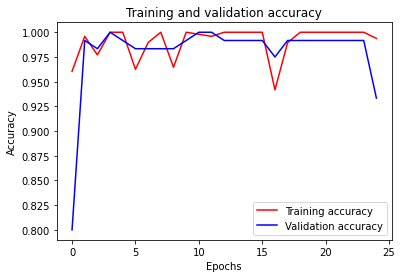

<Figure size 432x288 with 0 Axes>

10/10 [==============================] - 4s 439ms/step - loss: 29.4514 - accuracy: 0.7500
Test loss: 29.45140266418457, Test accuracy: 75.0


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# his = model.fit(x_train, y_train,epochs=25)
his = model.fit(x_train, y_train,validation_split=0.2,epochs=25,verbose=0)
train_acc =his.history['accuracy']

val_acc = his.history['val_accuracy']
epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))




